In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

sns.set(style="whitegrid")

In [4]:
df = pd.read_csv("/content/drive/MyDrive/train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

In [6]:
df["SalePrice"].describe()

,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


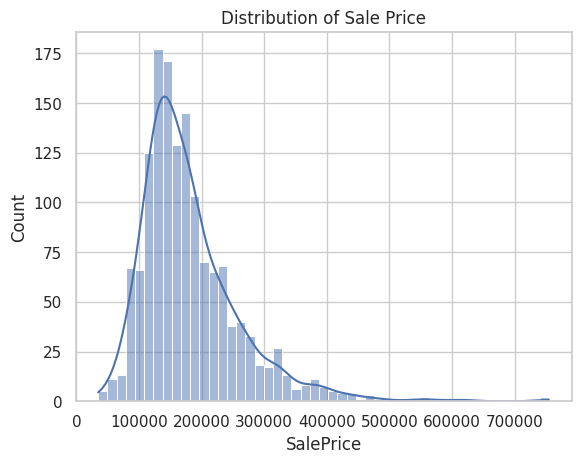

In [7]:
plt.figure()
sns.histplot(df["SalePrice"], kde=True)
plt.title("Distribution of Sale Price")
plt.show()

In [8]:
df["SalePrice_log"] = np.log(df["SalePrice"])

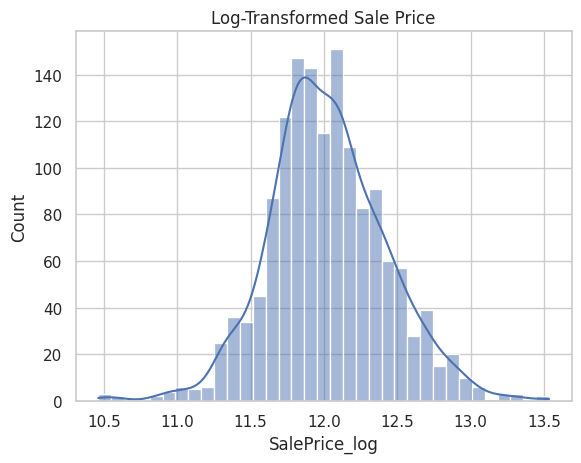

In [9]:
plt.figure()
sns.histplot(df["SalePrice_log"], kde=True)
plt.title("Log-Transformed Sale Price")
plt.show()

In [10]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing.head(15)

,0
PoolQC,1453
MiscFeature,1406
Alley,1369
Fence,1179
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81


In [11]:
df = df.drop(["PoolQC", "MiscFeature", "Alley", "Fence"], axis=1)

In [12]:
df.isnull().sum().sort_values(ascending=False).head(10)

,0
MasVnrType,872
FireplaceQu,690
LotFrontage,259
GarageQual,81
GarageType,81
GarageFinish,81
GarageCond,81
GarageYrBlt,81
BsmtExposure,38
BsmtFinType2,38


In [13]:
cat_cols = df.select_dtypes(include="object").columns

for col in cat_cols:
    df[col] = df[col].fillna("None")

In [14]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [15]:
df.isnull().sum().sum()

np.int64(0)

In [16]:
X = df.drop(["SalePrice", "SalePrice_log"], axis=1)
y = df["SalePrice_log"]

In [17]:
X = pd.get_dummies(X, drop_first=True)

In [18]:
X.shape

(1460, 248)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [20]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
model = LinearRegression()

model.fit(X_train_scaled, y_train)

LinearRegression()

In [22]:
y_pred = model.predict(X_test_scaled)

In [23]:
print("R2:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2: 0.7618091701892153
MAE: 0.0980279766730949
RMSE: 0.2108308060160471


In [24]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)

ridge.fit(X_train_scaled, y_train)

y_pred_ridge = ridge.predict(X_test_scaled)

print("R2:", r2_score(y_test, y_pred_ridge))
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_ridge)))

R2: 0.7837532894613248
MAE: 0.09734659848184529
RMSE: 0.20088444305907888


In [25]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.001)

lasso.fit(X_train_scaled, y_train)

y_pred_lasso = lasso.predict(X_test_scaled)

print("R2:", r2_score(y_test, y_pred_lasso))
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lasso)))

R2: 0.841367929876533
MAE: 0.09575568311060995
RMSE: 0.17205490028676007


In [26]:
coef = pd.Series(lasso.coef_, index=X.columns)

# Cuántas variables quedaron activas
active_features = (coef != 0).sum()

print("Total features:", len(coef))
print("Active features after Lasso:", active_features)


Total features: 248
Active features after Lasso: 172


In [27]:
# Top 10 features más influyentes
top_features = coef.sort_values(ascending=False).head(10)
bottom_features = coef.sort_values().head(10)

print("Top positive features:")
print(top_features)

print("\nTop negative features:")
print(bottom_features)

Top positive features:
RoofMatl_CompShg    0.211893
RoofMatl_Tar&Grv    0.151707
GrLivArea           0.114483
RoofMatl_WdShngl    0.102176
RoofMatl_WdShake    0.084430
OverallQual         0.070586
RoofMatl_Roll       0.050567
YearBuilt           0.050411
RoofMatl_Metal      0.049895
OverallCond         0.039332
dtype: float64

Top negative features:
Condition2_PosN        -0.031398
KitchenQual_TA         -0.017635
KitchenQual_Gd         -0.017533
BsmtQual_TA            -0.016495
Heating_Grav           -0.016082
Functional_Maj2        -0.013813
BldgType_Twnhs         -0.013741
Neighborhood_MeadowV   -0.013402
BsmtQual_Gd            -0.011802
KitchenAbvGr           -0.011424
dtype: float64


In [28]:
print("""
Conclusion:

The Lasso regression model outperformed both Linear and Ridge regression,
achieving an R² of 0.84 and reducing prediction error significantly.

Regularization helped reduce model complexity by eliminating irrelevant features,
improving generalization and interpretability.

Key drivers of house prices include overall quality, living area size,
and structural characteristics.
""")


Conclusion:

The Lasso regression model outperformed both Linear and Ridge regression,
achieving an R² of 0.84 and reducing prediction error significantly.

Regularization helped reduce model complexity by eliminating irrelevant features,
improving generalization and interpretability.

Key drivers of house prices include overall quality, living area size,
and structural characteristics.

